In [708]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [709]:
# Import the numpy and pandas packages
import numpy as np
import pandas as pd
# Import libraries for plot
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set(style="darkgrid")

### Read and inspect data from Uber Request Data.csv file

In [710]:
# import .csv file
df = pd.read_csv("Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [711]:
# inspecting data like column names, shape and datatype of each column
print(df.columns)
print(df.shape)
print(df.dtypes)

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')
(6745, 6)
Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object


### Data Cleaning and Preparation

In [712]:
## check for duplicate values in row
df["is_duplicate"]= df.duplicated()
print (df[df['is_duplicate'].astype(str).str.contains('True')])


Empty DataFrame
Columns: [Request id, Pickup point, Driver id, Status, Request timestamp, Drop timestamp, is_duplicate]
Index: []


In [713]:
## As you can see that there is 0 duplicate rows in dataframe.
## So we are deleting is_duplicate column as we don't need this anymore.
df = df.drop(['is_duplicate'],axis=1)

In [714]:
## checking null values in each column
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [715]:
#Let's check for spelling mistake in "Pickup point" and "Status" column

#In column Pickup point
print(df['Pickup point'].unique())

#In column Pickup point
print(df['Status'].unique())

['Airport' 'City']
['Trip Completed' 'Cancelled' 'No Cars Available']


In [716]:
# After all investigation let's inspect data again to cross check if everything is fine 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None


### Change data type for column "Request timestamp" and "Drop timestamp"

In [717]:
# replace "/" with "-" so that date format will look similar 
# And it will be easy to convert column data type 

df['Request timestamp'] = df['Request timestamp'].str.replace('/','-')
df['Drop timestamp'] = df['Drop timestamp'].str.replace('/','-')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-7-2016 11:51,11-7-2016 13:00
1,867,Airport,1.0,Trip Completed,11-7-2016 17:57,11-7-2016 18:47
2,1807,City,1.0,Trip Completed,12-7-2016 9:17,12-7-2016 9:58
3,2532,Airport,1.0,Trip Completed,12-7-2016 21:08,12-7-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [718]:
# As you can see that 'seconds' data is missing in few places
# So let's append ":00" to all these values, which will help to get date format correctly.

df['Request timestamp'] = df['Request timestamp'].apply(lambda x: '{}{}'.format(x,':00') if len(x.split(':'))<3 else x)
df['Drop timestamp'] = df['Drop timestamp'].apply(lambda x: '{}{}'.format(x,':00') if (len(str(x).split(':'))< 3 and pd.notnull(x)) else x )

In [719]:
# Now let's convert data type for column 'Request timestamp' and 'Drop timestamp' to datetime

df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], format = '%d-%m-%Y %H:%M:%S')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], format = '%d-%m-%Y %H:%M:%S')

# Check data type for column after conversion
print(df.dtypes)
df.head()

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


### Start Uber Supply-Demand Gap Analysis

In [720]:
# Derive more columns from date for analysis 
df['Request time'] = df['Request timestamp'].dt.time
df['Request hour'] = df['Request timestamp'].dt.hour
df['Request dayofweek'] = df['Request timestamp'].dt.strftime('%A')
df['Drop time'] = df['Request timestamp'].dt.time

df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request time,Request hour,Request dayofweek,Drop time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,11,Monday,11:51:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,17,Monday,17:57:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,9,Tuesday,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,21,Tuesday,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,8,Wednesday,08:33:16


In [721]:
# function to create new column with supply and gap status 
# to get the overall ratio of supply and demand
# "Trip Completed" = supply , "No Cars Available" = gap and "Cancelled" = gap

def supply_gap(status):
    if status == "Trip Completed":
        return "supply"
    else:
        return "gap"

In [722]:
#create supply gab column using above function
df['Supply gap'] = df['Status'].apply(supply_gap)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request time,Request hour,Request dayofweek,Drop time,Supply gap
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,11,Monday,11:51:00,supply
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,17,Monday,17:57:00,supply
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,9,Tuesday,09:17:00,supply
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,21,Tuesday,21:08:00,supply
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,8,Wednesday,08:33:16,supply


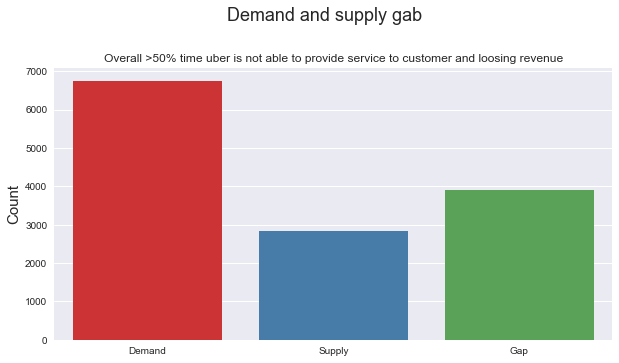

In [723]:
# first of all let's see in general demand/supply/gap in this case study
# let's plot demand/supply/gap bar chart

plt.figure(figsize=(10, 5))
plt.suptitle("Demand and supply gab", y=1.05, fontsize=18)
plt.title('Overall >50% time uber is not able to provide service to customer and loosing revenue', fontsize=12)
ax = sns.barplot(x=['Demand','Supply','Gap'],y=[len(df.index),len(df.loc[df['Supply gap']=='supply'].index),len(df.loc[df['Supply gap']=='gap'].index)],palette="Set1")
ax.set_ylabel("Count", fontsize=15);
plt.show()

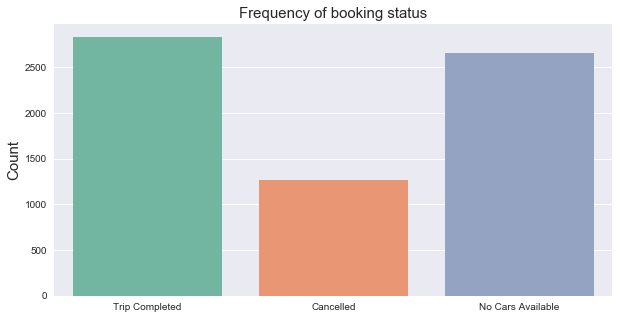

In [724]:
# now let's see what's the bigger problem in not matching demand 
# Plot frequency of booking status  

plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Status", data=df,palette="Set2")
ax.set_title('Frequency of booking status',fontsize=15)
ax.set_ylabel("Count", fontsize=15);
ax.set_xlabel("", fontsize=15);
plt.show()

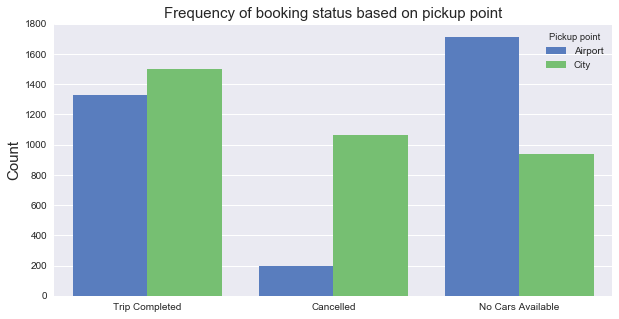

In [725]:
# Now let's see if "No Cars Available" is bigger problem on both the routes?
# plot booking status based on pickup point

plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Status",hue="Pickup point" ,data=df,palette="muted")
ax.set_title('Frequency of booking status based on pickup point',fontsize=15)
ax.set_ylabel("Count", fontsize=15);
ax.set_xlabel("", fontsize=15);
plt.show()

In [726]:
# Now since we have analysed the bigger problem on both the routes
# Let's see the pattern for status during weekday's

# for that first create a pivot table for weekday
categoies = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekdays = df.groupby(['Status', 'Request dayofweek']).size().reset_index().pivot(columns='Status', index='Request dayofweek', values=0).reindex(categoies) 
df_weekdays

Status,Cancelled,No Cars Available,Trip Completed
Request dayofweek,,,
Monday,262,504,601
Tuesday,240,505,562
Wednesday,270,490,577
Thursday,252,571,530
Friday,240,580,561


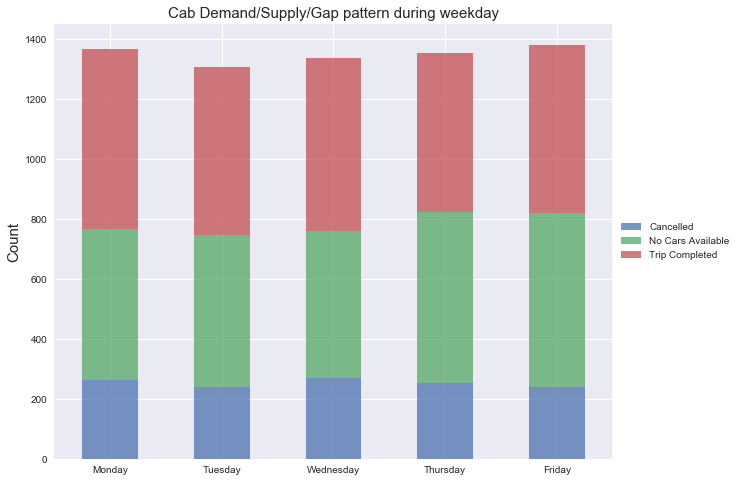

In [727]:
# then plot bar chart for weekday stacked by status 
ax = df_weekdays.plot.bar(stacked=True,figsize=(10,8),alpha=0.75, rot=0)
ax.set_title('Cab Demand/Supply/Gap pattern during weekday',fontsize=15)
ax.set_alpha(0.8)
ax.set_ylabel("Count", fontsize=15);
ax.set_xlabel("", fontsize=15);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [728]:
# Since we can't draw any outcome from above plot
# Let's see the pattern for status during 24 hours of day

# for that first create a pivot table hour Request hour
df_timeslot = df.groupby(['Status', 'Request hour']).size().reset_index().pivot(columns='Status', index='Request hour', values=0)
df_timeslot.head()

Status,Cancelled,No Cars Available,Trip Completed
Request hour,,,
0,3,56,40
1,4,56,25
2,5,57,37
3,2,56,34
4,51,74,78


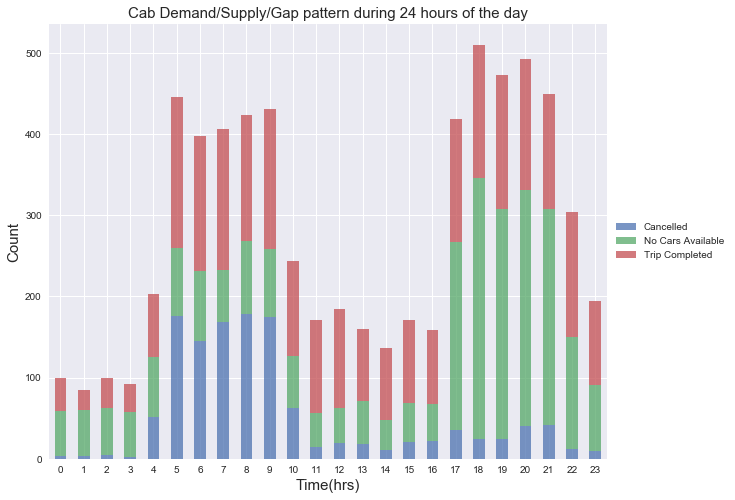

In [729]:
# then plot a bar chart for 24 hours of the day stacked with status
ax = df_timeslot.plot.bar(stacked=True,figsize=(10,8),alpha=0.75, rot=0)
ax.set_title('Cab Demand/Supply/Gap pattern during 24 hours of the day',fontsize=15)
ax.set_alpha(0.8)
ax.set_ylabel("Count", fontsize=15);
ax.set_xlabel("Time(hrs)", fontsize=15);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


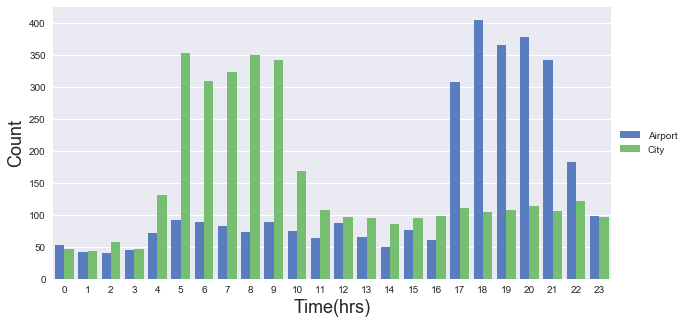

In [730]:
# now let's see frequency of request made based on pickup point
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Request hour" ,hue="Pickup point",data=df,palette="muted")
ax.set_ylabel("Count", fontsize=18);
ax.set_xlabel("Time(hrs)", fontsize=18);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [731]:
# Now let's create new columns "Trip duration" to see trip duration variation for both the routes
df['Trip duration'] = df['Drop timestamp'] - df['Request timestamp']

# convert this to seconds so that it will be easy to plot 
df['Trip duration'] = df['Trip duration'].dt.total_seconds()
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request time,Request hour,Request dayofweek,Drop time,Supply gap,Trip duration
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,11,Monday,11:51:00,supply,4140.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,17,Monday,17:57:00,supply,3000.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,9,Tuesday,09:17:00,supply,2460.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,21,Tuesday,21:08:00,supply,3300.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,8,Wednesday,08:33:16,supply,3151.0


In [732]:
# create one more column for "Peak hours" to see variation of trip duration based on peak hours
def peak_hours(time):
    morning_peak_start = 5 
    morning_peak_end = 10 
    evening_peak_start = 17 
    evening_peak_end = 22 
   
    if morning_peak_start <= time <= morning_peak_end:
        slot = "morning_peak"
    elif evening_peak_start <= time <= evening_peak_end:
        slot = "evening_peak"
    else:
        slot = "no_peak"
    return slot

df['Peak hour'] = df['Request hour'].apply(peak_hours)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request time,Request hour,Request dayofweek,Drop time,Supply gap,Trip duration,Peak hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,11,Monday,11:51:00,supply,4140.0,no_peak
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,17,Monday,17:57:00,supply,3000.0,evening_peak
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,9,Tuesday,09:17:00,supply,2460.0,morning_peak
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,21,Tuesday,21:08:00,supply,3300.0,evening_peak
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,8,Wednesday,08:33:16,supply,3151.0,morning_peak


In [733]:
# Now let's examine two (city-airport and airport-city) routes  seperately

# city to airport route
df_city_to_airport = df.loc[df['Pickup point'] == 'City']
df_city_to_airport.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request time,Request hour,Request dayofweek,Drop time,Supply gap,Trip duration,Peak hour
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,9,Tuesday,09:17:00,supply,2460.0,morning_peak
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,8,Wednesday,08:33:16,supply,3151.0,morning_peak
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17:57:27,17,Friday,17:57:27,supply,3204.0,evening_peak
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,06:46:00,6,Monday,06:46:00,supply,2340.0,morning_peak
11,1983,City,2.0,Trip Completed,2016-07-12 12:30:00,2016-07-12 12:57:00,12:30:00,12,Tuesday,12:30:00,supply,1620.0,no_peak


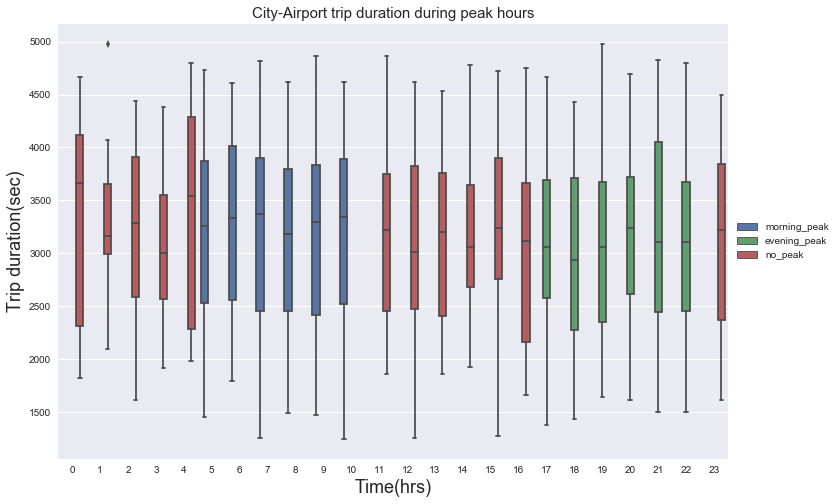

In [734]:
# let's see trip duration variation for city-airport route based on peak hours
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Request hour', y='Trip duration',hue='Peak hour', data=df_city_to_airport)
ax.set_ylabel("Trip duration(sec)", fontsize=18);
ax.set_title('City-Airport trip duration during peak hours',fontsize=15)
ax.set_xlabel("Time(hrs)", fontsize=18);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [735]:
# now let's see frequency of cab status during 24 hrs of day for city-airport route

# for that first create a Request hour pivot table for city to airport route
df_city_airport_demand = df_city_to_airport.groupby(['Status', 'Request hour']).size().reset_index().pivot(columns='Status', index='Request hour', values=0)
df_city_airport_demand.head()

Status,Cancelled,No Cars Available,Trip Completed
Request hour,,,
0,3,26,17
1,4,27,12
2,5,32,21
3,2,26,19
4,49,40,42


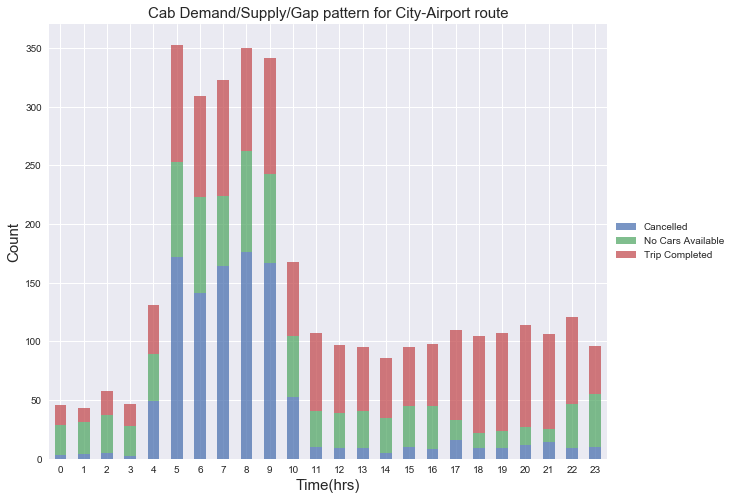

In [736]:
# plot Demand/Supply/Gap pattern for City-Airport route
ax = df_city_airport_demand.plot.bar(stacked=True,figsize=(10,8),alpha=0.75, rot=0)
ax.set_title('Cab Demand/Supply/Gap pattern for City-Airport route',fontsize=15)
ax.set_alpha(0.8)
ax.set_ylabel("Count", fontsize=15);
ax.set_xlabel("Time(hrs)", fontsize=15);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [737]:
# Now let's examine second(airport-city) route seperately
# airport to city route
df_airport_to_city = df.loc[df['Pickup point'] == 'Airport']
df_airport_to_city.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request time,Request hour,Request dayofweek,Drop time,Supply gap,Trip duration,Peak hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,11,Monday,11:51:00,supply,4140.0,no_peak
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,17,Monday,17:57:00,supply,3000.0,evening_peak
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,21,Tuesday,21:08:00,supply,3300.0,evening_peak
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21:57:28,21,Wednesday,21:57:28,supply,1891.0,evening_peak
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,06:15:32,6,Thursday,06:15:32,supply,3463.0,morning_peak


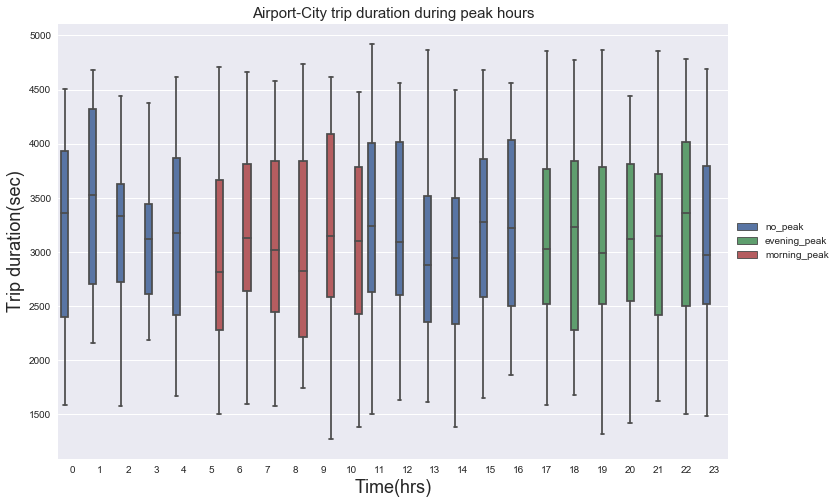

In [738]:
# let's see trip duration variation for airport-city route based on peak hours
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Request hour', y='Trip duration',hue='Peak hour', data=df_airport_to_city)
ax.set_title('Airport-City trip duration during peak hours',fontsize=15)
ax.set_ylabel("Trip duration(sec)", fontsize=18);
ax.set_xlabel("Time(hrs)", fontsize=18);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [739]:
# now let's see frequency of cab status during 24 hrs of day for airport-city route

# for that first create a Request hour pivot table for airport to city route
df_airport_city_demand = df_airport_to_city.groupby(['Status', 'Request hour']).size().reset_index().pivot(columns='Status', index='Request hour', values=0)
df_airport_city_demand.head()

Status,Cancelled,No Cars Available,Trip Completed
Request hour,,,
0,NaN,30.0,23.0
1,NaN,29.0,13.0
2,NaN,25.0,16.0
3,NaN,30.0,15.0
4,2.0,34.0,36.0


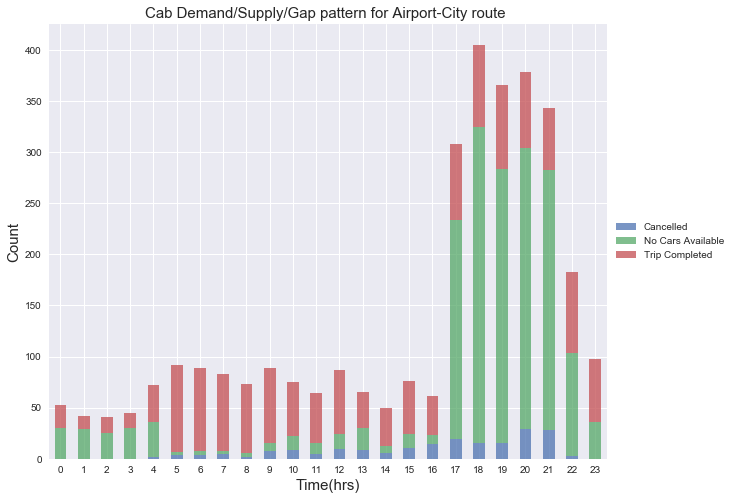

In [740]:
# plot Demand/Supply/Gap pattern for Airport-City route
ax = df_airport_city_demand.plot.bar(stacked=True,figsize=(10,8),alpha=0.75, rot=0)
ax.set_title('Cab Demand/Supply/Gap pattern for Airport-City route ',fontsize=15)
ax.set_alpha(0.8)
ax.set_ylabel("Count", fontsize=15);
ax.set_xlabel("Time(hrs)", fontsize=15);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### City to Airport - major problem is "cancelled" duing morning peak hours (5AM-10AM)
### Airport to City - major problem is "No Cars Available" during evening peak hours (5PM-10PM)